In [18]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import mglearn

In [35]:
#A regressãoo linear encontra o parametro w e b que minimizam 
#o erro médio quadratico entre a previsão e o valor real.
#
#O parametro w é o declive e o parametro b é o offset da funçao
#
#a formula para a regressao linear simples é definida da seguinte maneira:
#y = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b

w[0]: 0.393906  b: -0.031804


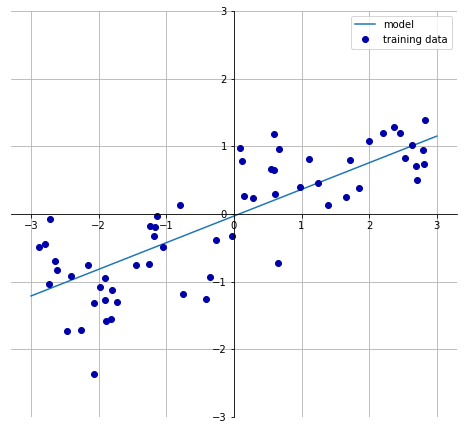

In [36]:
#Exemplo de aproximação pela regressão linear dos minimos quadrados.
mglearn.plots.plot_linear_regression_wave()

In [37]:
#funcao para apresentar a precisao do metodo r informado.
def show_score(r,X_train, X_test, y_train, y_test):
    print("training set score: %f" % r.score(X_train, y_train))
    print("test set score: %f" % r.score(X_test, y_test))

In [38]:
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [39]:
show_score(lr,X_train, X_test, y_train, y_test)

training set score: 0.670089
test set score: 0.659337


In [41]:
#observe que X é uma matrix de uma dimensao apenas.
X.shape

(60, 1)

In [42]:
#Para um modelo de uma dimensão esse modelo não é aconcelhado,
#pois acaba gerando um overfitting(superação).
#Porém, para modelos com dataset que possuem várias dimensões esse
#modelo se torna viável.
#
#Veja o exemplo a seguir

In [45]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [46]:
X.shape

(506, 104)

In [47]:
lr = LinearRegression().fit(X_train, y_train)

In [48]:
show_score(lr,X_train, X_test, y_train, y_test)

training set score: 0.952353
test set score: 0.605775


In [49]:
#A ridge regression é um método de regularização do modelo
#que tem como objetivo suavizar os atributos que sejam
#relacionados uns aos outros.

In [50]:
ridge = Ridge().fit(X_train, y_train)

In [51]:
show_score(ridge, X_train, X_test, y_train, y_test)

training set score: 0.886058
test set score: 0.752714


In [ ]:
#o parametro alpha pode ser adicionado ao construtor do Ridge
#Esse parametro representa a importancia que o metodo dá
#para a simplicidade ao invez da performace do modelo.

In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [26]:
show_score(ridge10, X_train, X_test, y_train, y_test)

training set score: 0.788346
test set score: 0.635897


In [27]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

In [28]:
show_score(ridge01, X_train, X_test, y_train, y_test)

training set score: 0.928578
test set score: 0.771793


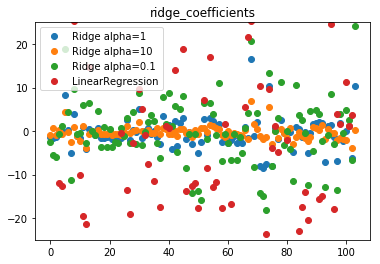

In [29]:
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25,25)
plt.legend()

In [30]:
def show_lasso_score(l,X_train, X_test, y_train, y_test):
    print("training set score: %f" % l.score(X_train, y_train))
    print("test set score: %f" % l.score(X_test, y_test))
    print("number of features used: %d" % np.sum(lasso.coef_ != 0))
    

In [ ]:
#O metodo LASSO utiliza o mecanismo de penalizar os coeficientes
#de acordo com o seu valor absoluto(soma dos valores dos estumadores)
#usando o mecanismo de minimizar o erro quadrático.
#Isso é feio até que o mesmo convirja para zero.

In [31]:
lasso = Lasso().fit(X_train,y_train)
show_lasso_score(lasso, X_train, X_test, y_train, y_test)

training set score: 0.293238
test set score: 0.209375
number of features used: 4


In [ ]:
#Igual ao Ridge o LASSO tambem possui o parametro alpha para
#controlar o quao forte os coeficientes serao 'puxados' para zero.

In [32]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
show_lasso_score(lasso001, X_train, X_test, y_train, y_test)

training set score: 0.896408
test set score: 0.767806
number of features used: 4


/home/gustavo/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [33]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
show_lasso_score(lasso00001, X_train, X_test, y_train, y_test)

training set score: 0.942433
test set score: 0.695635
number of features used: 4


/home/gustavo/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


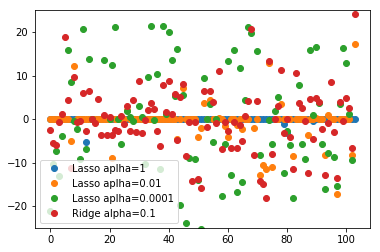

In [34]:
plt.plot(lasso.coef_, 'o', label="Lasso aplha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso aplha=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso aplha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25,25)
plt.legend()